In [10]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
Match_day = pd.read_csv('https://statso.io/wp-content/uploads/2025/04/ipl_match_1473461_deliveries.csv')
Match_day_copy = Match_day.copy()

In [12]:
Match_day

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN


In [13]:
Match_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         236 non-null    object
 1   over         236 non-null    int64 
 2   batter       236 non-null    object
 3   bowler       236 non-null    object
 4   non_striker  236 non-null    object
 5   runs_batter  236 non-null    int64 
 6   runs_extras  236 non-null    int64 
 7   runs_total   236 non-null    int64 
 8   extras_type  11 non-null     object
 9   wicket_kind  11 non-null     object
 10  player_out   11 non-null     object
 11  fielders     11 non-null     object
dtypes: int64(4), object(8)
memory usage: 22.3+ KB


In [14]:
Match_day.describe()

,over,runs_batter,runs_extras,runs_total
count,236.000000,236.000000,236.000000,236.000000
mean,9.004237,1.313559,0.093220,1.406780
std,5.651208,1.756201,0.553323,1.782837
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.000000
75%,14.000000,1.000000,0.000000,1.000000
max,19.000000,6.000000,5.000000,6.000000


Checking a missing value


In [15]:
Match_day.isnull().sum()

team             0
over             0
batter           0
bowler           0
non_striker      0
runs_batter      0
runs_extras      0
runs_total       0
extras_type    225
wicket_kind    225
player_out     225
fielders       225
dtype: int64

Lets analyse the top Scorers from each team

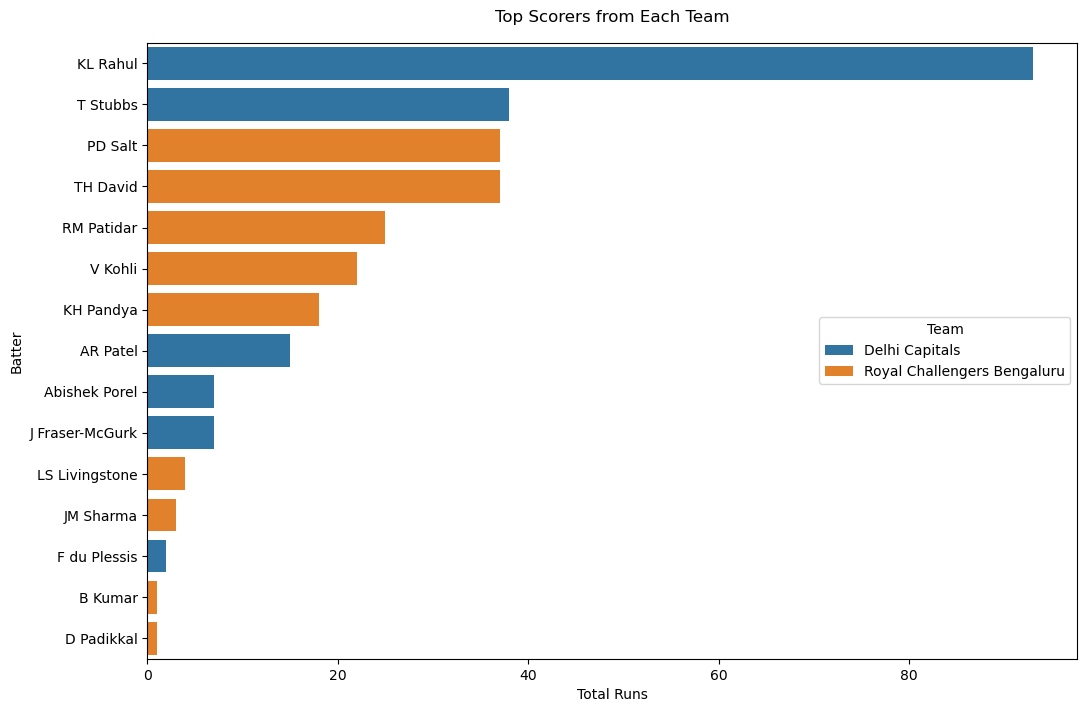

In [16]:
top_scorers = Match_day.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers from Each Team',pad=15)
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')

plt.show()

let’s calculate each batter’s strike rate across different phases of the game and visualize their batting intent:


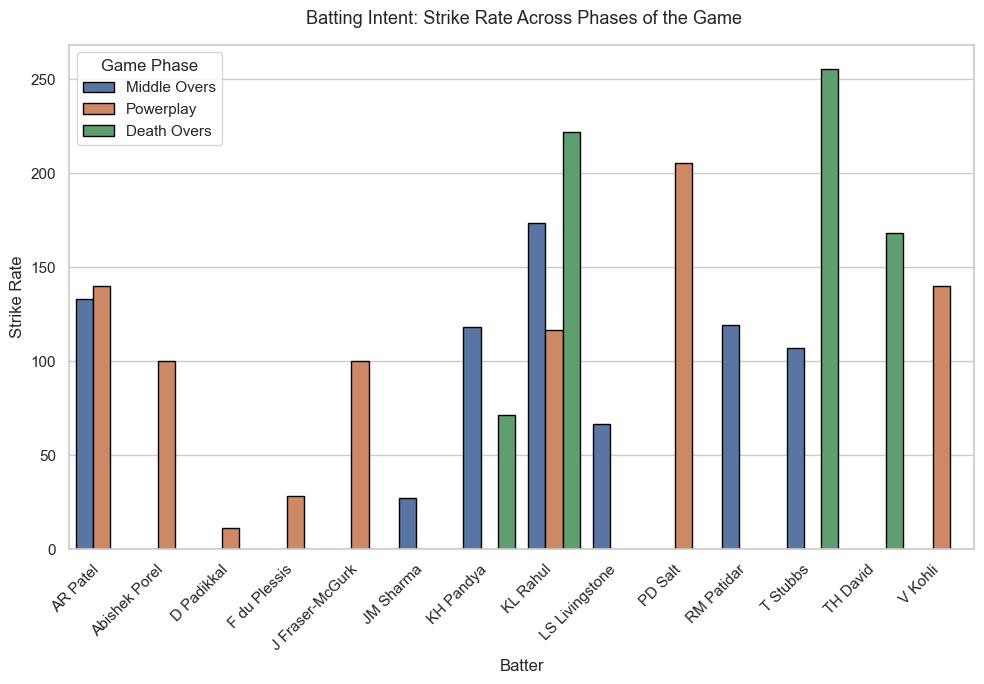

In [22]:
#Powerplay, Middle Overs, and Death Overs; based on the over number:

def get_phase(over):
    if over < 6:
        return 'Powerplay'
    elif 6 <= over < 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

Match_day_copy['phase'] = Match_day_copy['over'].apply(get_phase)


batting_intent = (Match_day_copy.groupby(['batter', 'phase']) .agg(balls_faced=('runs_batter', 'count'),total_runs=('runs_batter', 'sum')) .reset_index())

batting_intent['strike_rate'] = (batting_intent['total_runs'] / batting_intent['balls_faced']) * 100

batting_intent = batting_intent[batting_intent['balls_faced'] >= 5]

batting_intent.sort_values(by=['batter', 'phase'], inplace=True)




# Set figure size and style
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

# Create the grouped bar chart
sns.barplot(data=batting_intent, x='batter', y='strike_rate', hue='phase', errorbar=None, edgecolor='black')

# Customize plot
plt.title(' Batting Intent: Strike Rate Across Phases of the Game', fontsize=13,pad =15)
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Game Phase')
plt.tight_layout()
plt.show()


Now, let’s compare the batting intent of both teams across different match phases using strike rate as a metric:

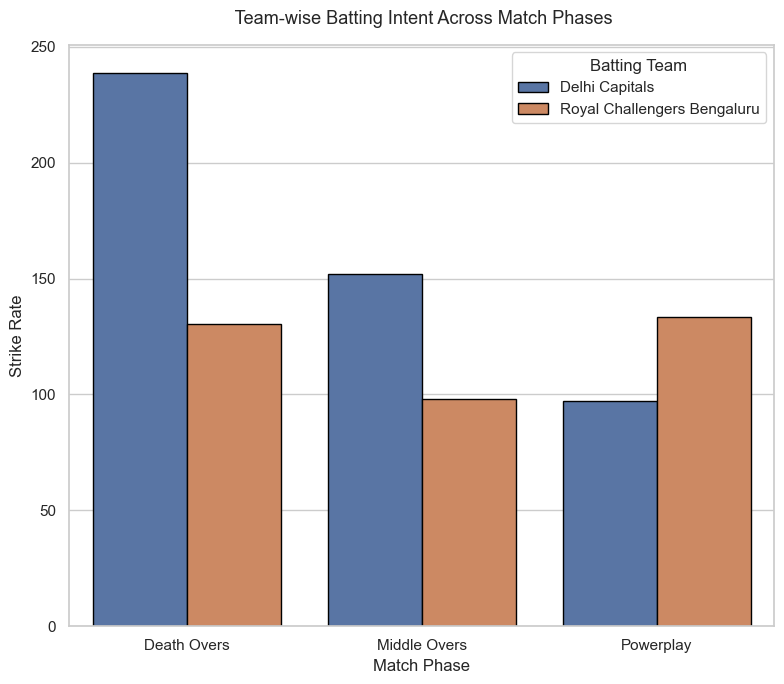

In [42]:
Match_day_copy['batting_team'] = Match_day_copy['team']

team_phase_intent = ( Match_day_copy.groupby(['batting_team', 'phase']).agg(balls_faced=('runs_batter', 'count'),total_runs=('runs_batter', 'sum')) .reset_index())

team_phase_intent['strike_rate'] = (team_phase_intent['total_runs'] / team_phase_intent['balls_faced']) * 100


# Set up figure and style
plt.figure(figsize=(8, 7))
sns.set_theme(style="whitegrid")

# Create grouped bar plot
sns.barplot( data=team_phase_intent,  x='phase',  y='strike_rate',  hue='batting_team',  errorbar=None,  edgecolor='black')

# Customize layout
plt.title(' Team-wise Batting Intent Across Match Phases', fontsize=13,pad = 15)
plt.xlabel('Match Phase')
plt.ylabel('Strike Rate')
plt.legend(title='Batting Team')
plt.tight_layout()
plt.show()



Now, let’s analyze each batter’s ability to rotate strike and score boundaries by calculating their Boundary % and Dot Ball %:

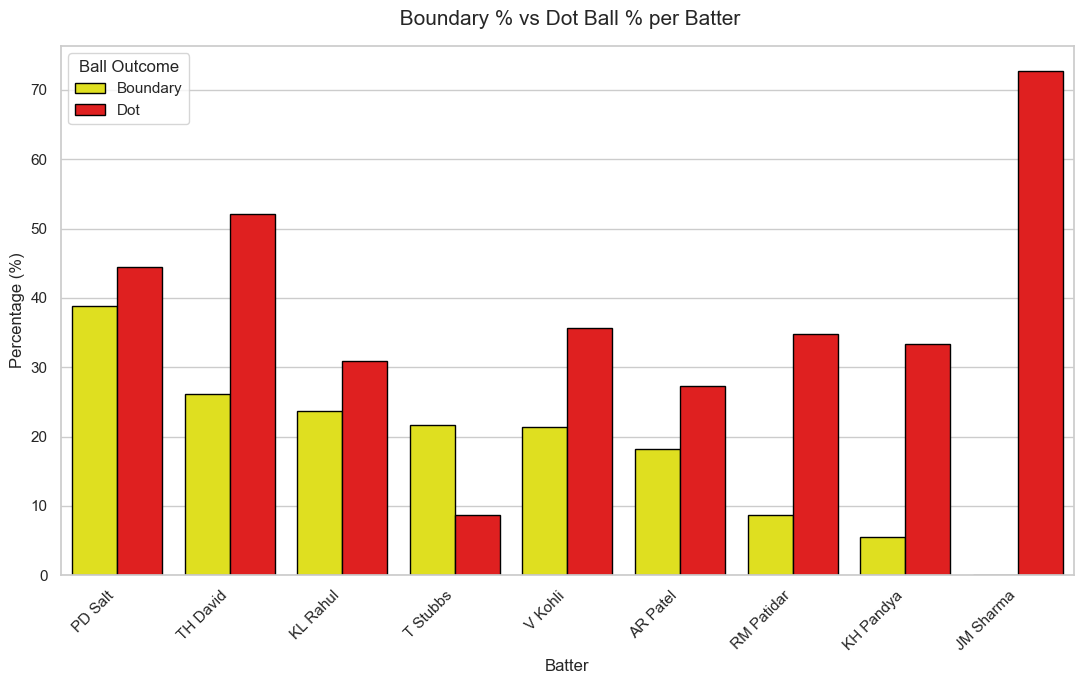

In [23]:
Match_day_copy['ball_outcome'] = Match_day_copy['runs_batter'].apply(lambda x: 'Dot' if x == 0 else ('Boundary' if x >= 4 else 'Run'))

batter_outcome_stats = ( Match_day_copy.groupby('batter').ball_outcome.value_counts(normalize=True).unstack().fillna(0) * 100).reset_index()

balls_faced = Match_day_copy.groupby('batter').size().reset_index(name='balls_faced')
batter_outcome_stats = batter_outcome_stats.merge(balls_faced, on='batter')
batter_outcome_stats = batter_outcome_stats[batter_outcome_stats['balls_faced'] >= 10]

batter_outcome_stats = batter_outcome_stats.sort_values(by='Boundary', ascending=False)



# Prepare data in long format for seaborn
batter_outcome_long = pd.melt(batter_outcome_stats,id_vars='batter',value_vars=['Boundary', 'Dot'],var_name='Outcome',value_name='Percentage')

# Set up the figure
plt.figure(figsize=(11, 7))
sns.set_theme(style="whitegrid")

# Create grouped bar plot
sns.barplot(data=batter_outcome_long,x='batter',y='Percentage',hue='Outcome',palette={'Boundary': 'Yellow', 'Dot': 'red'},edgecolor='black')

# Customize layout
plt.title(' Boundary % vs Dot Ball % per Batter', fontsize=15, pad=15)
plt.xlabel('Batter')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ball Outcome')
plt.tight_layout()
plt.show()


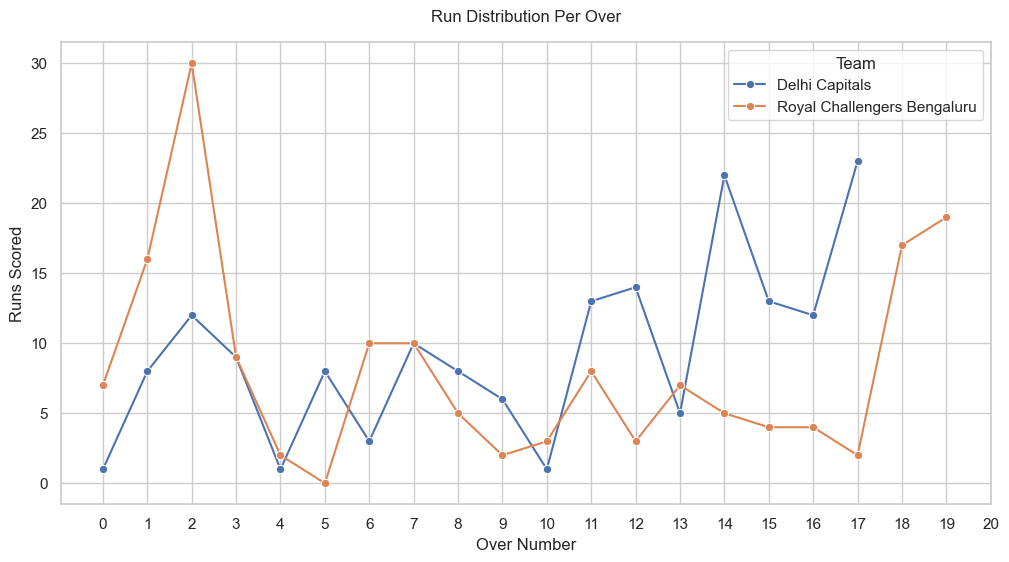

In [52]:
run_distribution = Match_day.groupby(['team','over']).agg({'runs_total':'sum'}).reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution Per Over',pad = 15)
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  
plt.legend(title='Team')
plt.show()

Now, let’s compare how runs and wickets fluctuated over each over to understand momentum shifts during the innings:

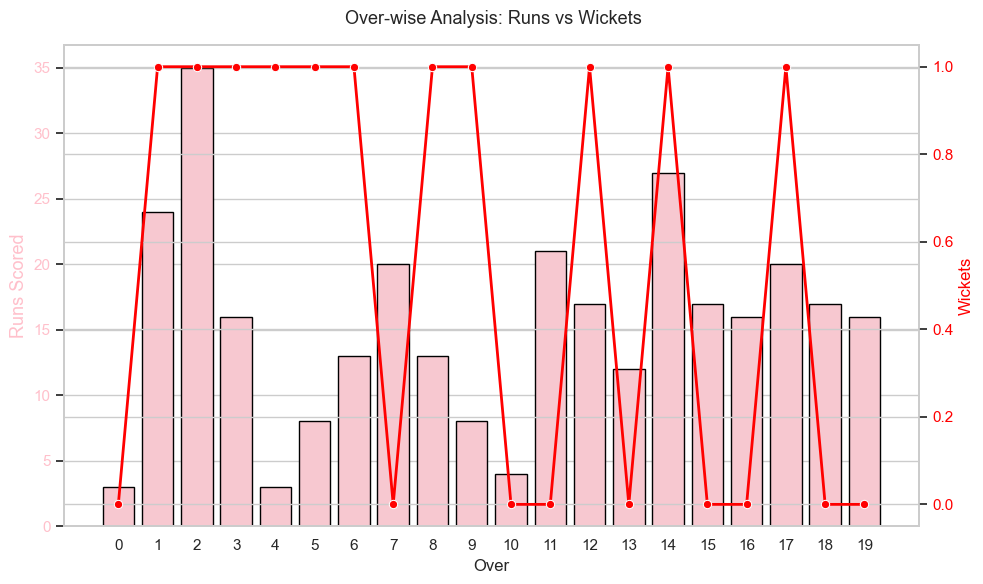

In [60]:
wickets_Match_day = Match_day_copy[Match_day_copy['player_out'].notna()]

wickets_by_over = wickets_Match_day.groupby('over').size().reset_index(name='wickets')

runs_by_over = Match_day_copy.groupby('over')['runs_batter'].sum().reset_index(name='total_runs')

overwise_analysis = pd.merge(runs_by_over, wickets_by_over, on='over', how='left').fillna(0)


# Set style
sns.set_theme(style="whitegrid")

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot: Runs scored
sns.barplot(x='over',y='total_runs',data=overwise_analysis,color='Pink',ax=ax1,edgecolor='black')

# Configure primary y-axis
ax1.set_xlabel('Over')
ax1.set_ylabel('Runs Scored', color='pink',fontsize=13)
ax1.tick_params(axis='y', labelcolor='pink')

# Create secondary y-axis for wickets
ax2 = ax1.twinx()

# Line plot: Wickets
sns.lineplot(x='over',y='wickets',data=overwise_analysis,color='red',marker='o',linewidth=2,ax=ax2)

# Configure secondary y-axis
ax2.set_ylabel('Wickets', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Final layout and title
plt.title(' Over-wise Analysis: Runs vs Wickets', fontsize=13, pad=15)
fig.tight_layout()
plt.show()


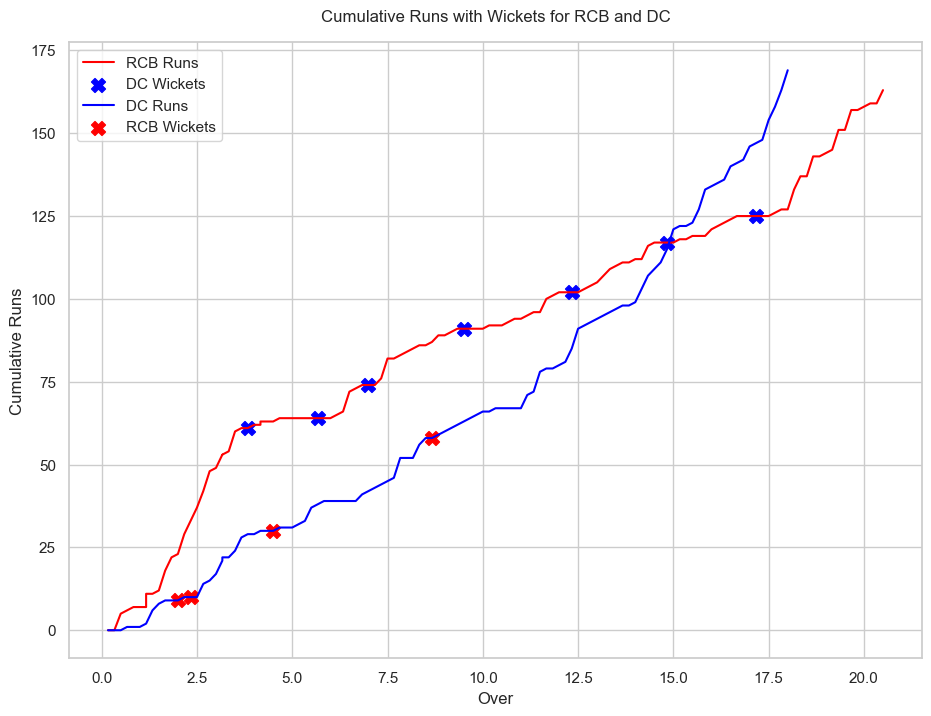

In [76]:
Match_day = Match_day.copy()

# Create 'wickets_taken' column based on 'player_out' column
Match_day['wickets_taken'] = Match_day['player_out'].notna().astype(int)

# Calculate cumulative wickets
Match_day['cumulative_runs'] = Match_day.groupby('team')['runs_total'].cumsum()
Match_day['cumulative_wickets'] = Match_day.groupby('team')['wickets_taken'].cumsum()

# Separate data for both teams and create copies explicitly
rcb_deliveries = Match_day[Match_day['team'] == 'Royal Challengers Bengaluru'].copy()
dc_deliveries = Match_day[Match_day['team'] == 'Delhi Capitals'].copy()

# Adding 'over_ball' to rcb_deliveries
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6

# Adding 'over_ball' to dc_deliveries
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(11, 8))

# plot for RCB
ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='red',label='RCB Runs')
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100,label = 'DC Wickets')

# plot for DC
ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='blue', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100,label = 'RCB Wickets')

ax.set_title('Cumulative Runs with Wickets for RCB and DC',pad =15)
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

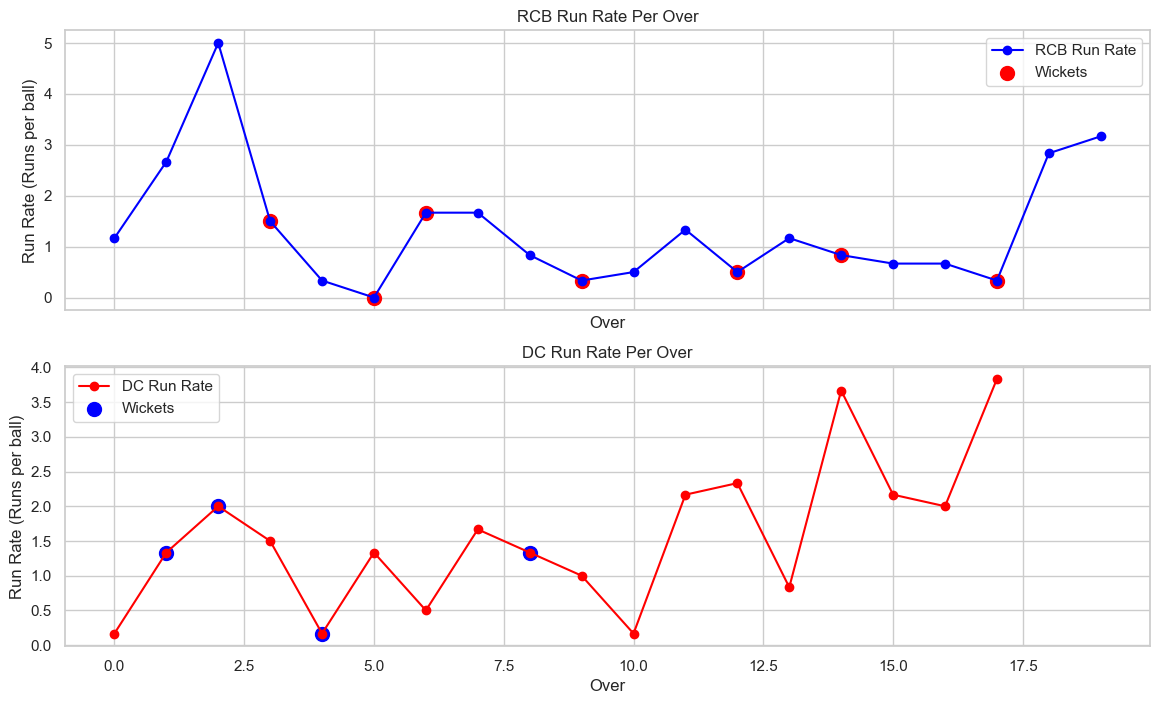

In [77]:
per_over_stats = Match_day.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()

# calculate run rate for each over
per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6)    # Runs per over to runs per ball (standard rate)

# separate data for RCB and DC for plotting
rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']

# plotting run rates and marking wickets for each team
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# RCB
ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='blue', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['over'], rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['run_rate'], color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_xlabel('Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

# DC
ax2.plot(dc_per_over_stats['over'], dc_per_over_stats['run_rate'], marker='o', color='red', label='DC Run Rate')
ax2.scatter(dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['over'], dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['run_rate'], color='blue', s=100, label='Wickets')
ax2.set_title('DC Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()

plt.show()

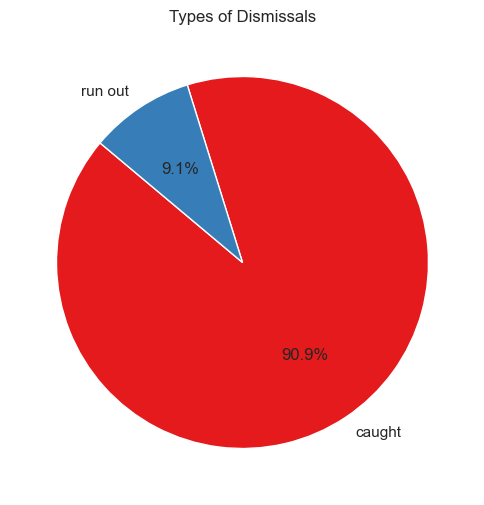

In [24]:
dismissal_types = Match_day['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(6, 7))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
plt.title('Types of Dismissals')
plt.show()